# 3D Face Plot

Attenzione visualization

In [1]:
%load_ext autoreload
%autoreload 2
import os
from os.path import join
import sys
import time
import cv2 as cv
import numpy as np
import imutils
import matplotlib.animation
%matplotlib notebook
from glob import glob
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
from random import randint
sys.path.append('/work/megapixels_dev/3rdparty/face-alignment')
import face_alignment
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import random
from skimage import io

ModuleNotFoundError: No module named 'face_alignment'

In [51]:
# Generate random hex colors
def rhex():
  r = lambda: random.randint(0,255)
  return '#%02X%02X%02X' % (r(), r(), r())

In [53]:
# init 3d face
# Run the 3D face alignment on a test image, without CUDA.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, 
                                  enable_cuda=True, flip_input=True)

In [54]:
data_bodega = '../data_bodega/'
fp = join(data_bodega,'images/msceleb/**/*.jpg')
face_files = glob(fp,recursive=True)
face_files = [f for f in face_files if os.path.basename(f) == '0-FaceId-0.jpg']
print(len(face_files))

80


In [39]:
fp_face = face_files[randint(0,len(face_files)-1)]
im = io.imread(fp_face)

../data_bodega/images/msceleb/m.0k014/0-FaceId-0.jpg


In [40]:
preds = fa.get_landmarks(im)[-1]

In [41]:
xmm = (np.min(preds[:,0]),np.max(preds[:,0]))
ymm = (np.min(preds[:,1]),np.max(preds[:,1]))
zmm = (np.min(preds[:,2]),np.max(preds[:,2]))
print(xmm,ymm,zmm)

(31.0, 256.0) (97.0, 293.0) (-101.42858, 71.526764)


In [44]:
# # draw person
# fig = plt.figure(figsize=plt.figaspect(.5))
# ax = fig.add_subplot(1, 2, 1)
# ax.imshow(im)
# ax.plot(preds[0:17,0],preds[0:17,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[17:22,0],preds[17:22,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[22:27,0],preds[22:27,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[27:31,0],preds[27:31,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[31:36,0],preds[31:36,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[36:42,0],preds[36:42,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[42:48,0],preds[42:48,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[48:60,0],preds[48:60,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
# ax.plot(preds[60:68,0],preds[60:68,1],marker='o',markersize=6,linestyle='-',color='w',lw=2) 
# ax.axis('off')
# plt.show()

In [45]:
preds_orig = preds.copy()

In [46]:
xmm_sc = (1.2*np.min(preds[:,0]),1.2*np.max(preds_orig[:,0]))
xmm = (np.min(preds_orig[:,0]),np.max(preds_orig[:,0]))
ymm = (np.min(preds_orig[:,1]),np.max(preds_orig[:,1]))
zmm = (np.min(preds_orig[:,2]),np.max(preds_orig[:,2]))


In [47]:
#$preds = np.array( [p[0]-xmm[0], p[1]-ymm[1], p[2]-zmm[0]] for p in preds_orig)
preds = np.zeros_like(preds_orig).astype(np.uint8)
for i,p in enumerate(preds_orig):
  x,y,z = p
  preds[i] = np.array([x - xmm[0], y - ymm[0], z - zmm[0]])
  preds[i] = np.array([x - xmm[0], z - zmm[0], y - ymm[0]])
  #preds[i] = np.array([x - xmm[0], abs((z - zmm[0])+zmm[0]), y - ymm[0]])
  
#preds = np.rot90(preds,2,axes=(0,1))

<IPython.core.display.Javascript object>


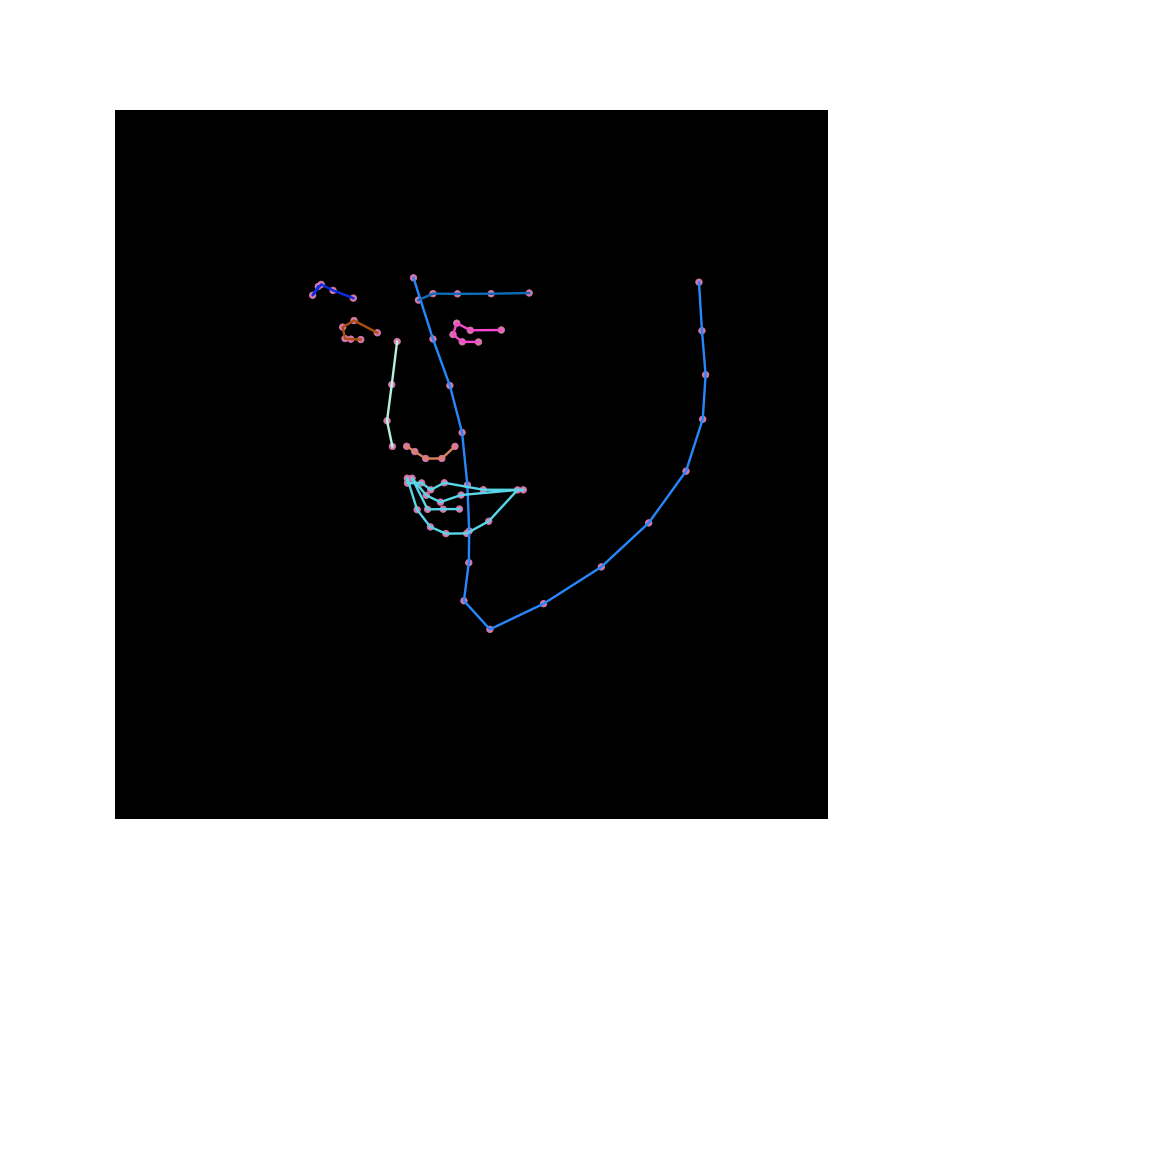

(31.0, 256.0) (97.0, 293.0) (-101.42858, 71.526764)
143.0 195.0 -15.428581237792969


In [49]:
#TODO: Make this nice
fig = plt.figure(figsize=(16,16),dpi=72)
ax = fig.add_subplot(111, projection='3d')

preds_scaled = np.array([1.2*x,y,z] for x,y,z in preds)

preds_plot = np.zeros_like(preds)
for i,p in enumerate(preds):
  x,y,z = p
  preds_plot[i] = np.array([x,y,z])

clr1 = '#00ff00'
clr2 = '#00ff00'

clr1 = '#ff0000'
clr2 = '#ff0000'

ax.set_facecolor('black')
#ax.set_facecolor((1, 0, 0))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
#rgb = ls.shade(preds[:,1], cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
rh = rhex()
surf = ax.scatter(preds_plot[:,0]*1.2,preds_plot[:,1],preds_plot[:,2],c=rh, 
                  alpha=1.0, s=65, edgecolor=rh)
#facecolors=rgb,linewidth=0, antialiased=False, shade=Fals


#surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
#                       linewidth=0, antialiased=False, shade=False)


#surf.actor.property.specular = 0.1
#surf.actor.property.specular_power = 5

lw = 3
ax.plot3D(preds_plot[:17,0]*1.2,preds_plot[:17,1], preds_plot[:17,2], color=rhex(),linewidth=lw)
ax.plot3D(preds_plot[17:22,0]*1.2,preds_plot[17:22,1],preds_plot[17:22,2], color=rhex(),linewidth=lw)
ax.plot3D(preds_plot[22:27,0]*1.2,preds_plot[22:27,1],preds_plot[22:27,2], color=rhex(),linewidth=lw)
ax.plot3D(preds_plot[27:31,0]*1.2,preds_plot[27:31,1],preds_plot[27:31,2], color=rhex(),linewidth=lw)
ax.plot3D(preds_plot[31:36,0]*1.2,preds_plot[31:36,1],preds_plot[31:36,2], color=rhex(),linewidth=lw)
ax.plot3D(preds_plot[36:42,0]*1.2,preds_plot[36:42,1],preds_plot[36:42,2], color=rhex(),linewidth=lw)
ax.plot3D(preds_plot[42:48,0]*1.2,preds_plot[42:48,1],preds_plot[42:48,2], color=rhex(),linewidth=lw)
ax.plot3D(preds_plot[48:,0]*1.2,preds_plot[48:,1],preds_plot[48:,2], color=rhex(), linewidth=lw)


print(xmm,ymm,zmm)
# ax.set_xlim3d(left=xmm[0],right=xmm[1])
# ax.set_ylim3d(bottom=ymm[0],top=ymm[1])
# ax.set_zlim3d(bottom=zmm[0],top=zmm[1])

cx = ((xmm[0] - xmm[1]) // 2) + xmm[1]
cy = ((ymm[1] - ymm[0]) // 2) + ymm[0]
cz = ((zmm[1] - zmm[0]) // 2) + zmm[0]
print(cx,cy,cz)

xpts = [cx,cx]
ypts = [cy,cy]
zpts = [zmm[0],zmm[1]]

#ax.plot3D(xpts,ypts,zpts,color='red')

# need to make this dynamic, sigh
ax.view_init(elev=120., azim=70.)
#ax.view_init(elev=90., azim=40.)

margin = 20

#ax.set_xlim(xmm[0] - margin,xmm[1] + margin)
#ax.set_ylim(ymm[0] - margin,ymm[1] + margin)
#ax.set_zlim(zmm[0] - margin,zmm[1] + margin)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('test.png', dpi=80)
plt.show()


In [50]:
fname_out = join(data_bodega,'output', '{}.gif'.format(os.path.basename(os.path.dirname(fp_face))))

phi = np.linspace(0, 2*np.pi,60)

def update(phi):
    ax.view_init(180,phi*180./np.pi)
    #ax.view_init(90,phi*90./np.pi)
    #ax.view_init(elev=90., azim=90.)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=phi)
ani.save(fname_out, writer='imagemagick', fps=10)
#plt.show()

../data_bodega/output/m.0k014.gif
